Connected to Data Warehouse


/var/folders/yt/znj162f935q7c78y4t17wl5c0000gn/T/ipykernel_2847/1963292425.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  summary = pd.read_sql("""


EXECUTIVE SUMMARY


,total_customers,total_orders,total_revenue,first_sale,last_sale
0,5942,53628,19287250.55,2009-12-01 07:45:00,2011-12-09 12:50:00


/var/folders/yt/znj162f935q7c78y4t17wl5c0000gn/T/ipykernel_2847/1963292425.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql("""


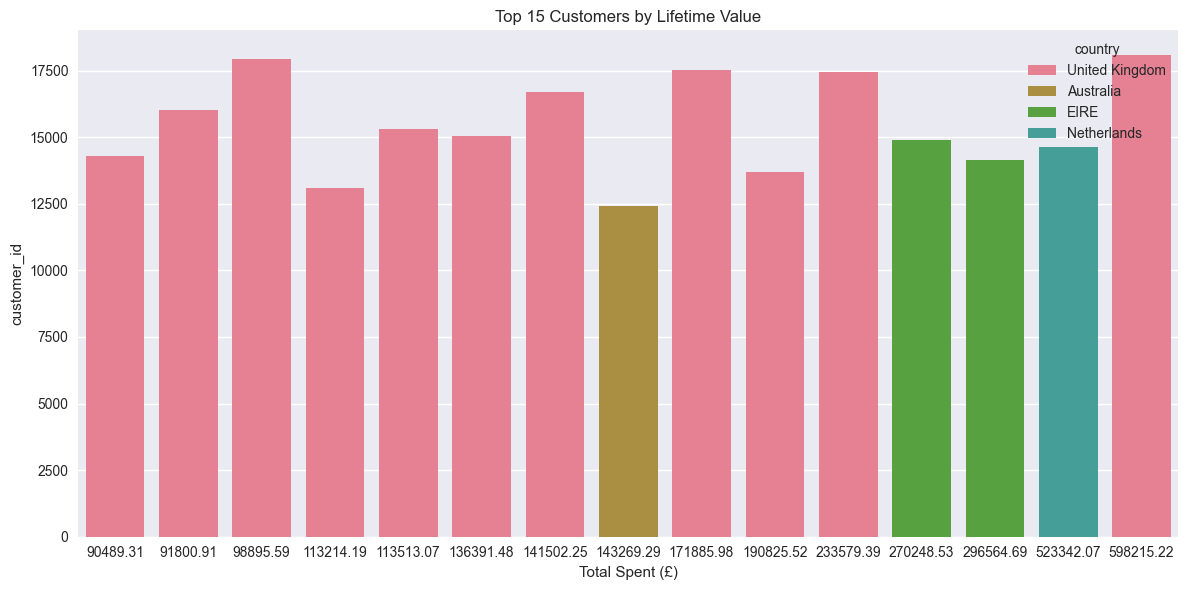

/var/folders/yt/znj162f935q7c78y4t17wl5c0000gn/T/ipykernel_2847/1963292425.py:52: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions = pd.read_sql("""


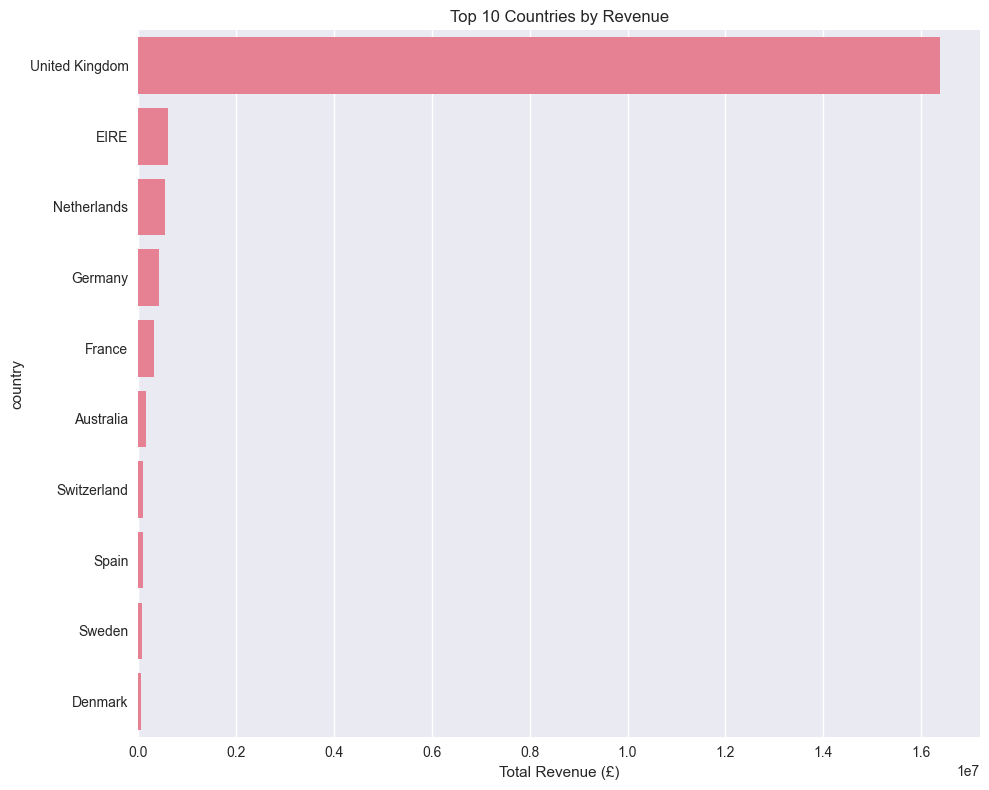

🏆 Top Performing Country: United Kingdom


/var/folders/yt/znj162f935q7c78y4t17wl5c0000gn/T/ipykernel_2847/1963292425.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  returns = pd.read_sql("""


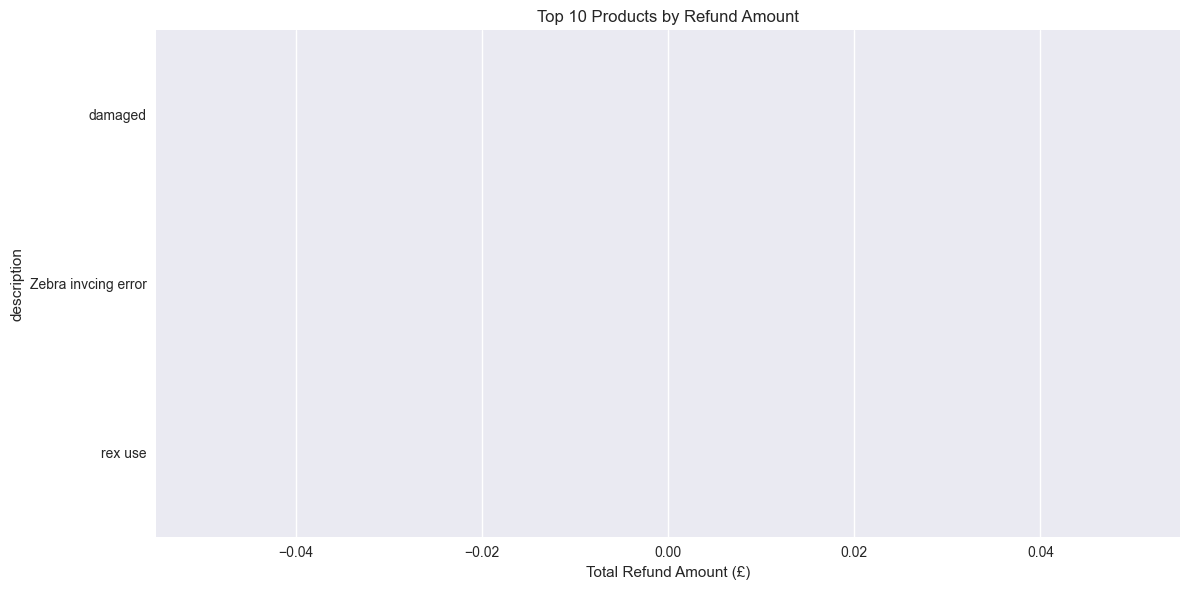

/var/folders/yt/znj162f935q7c78y4t17wl5c0000gn/T/ipykernel_2847/1963292425.py:83: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  daily_rev = pd.read_sql("""


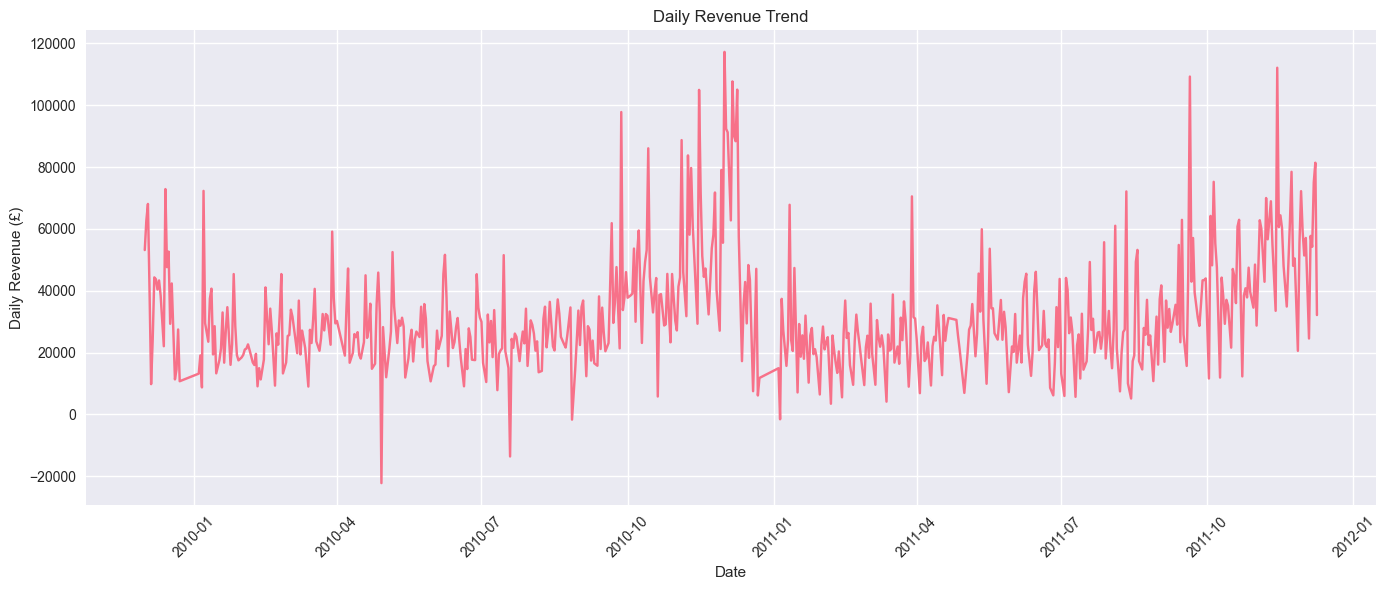

Analysis Complete


In [3]:
# notebooks/business_analytics.ipynb

# Cell 1: Setup and Imports
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append('..')
from src.config import get_db_connection_string

# Setup plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Connect to database
conn = psycopg2.connect(get_db_connection_string())
print("Connected to Data Warehouse")

# Cell 2: Executive Summary
summary = pd.read_sql("""
    SELECT 
        COUNT(DISTINCT customer_id) as total_customers,
        COUNT(DISTINCT invoice) as total_orders, 
        SUM(quantity * price) as total_revenue,
        MIN(invoice_date) as first_sale,
        MAX(invoice_date) as last_sale
    FROM staging.retail_sales_raw
""", conn)

print("EXECUTIVE SUMMARY")
display(summary)

# Cell 3: Top Customers Visualization
top_customers = pd.read_sql("""
    SELECT customer_id, total_spent, total_orders, country
    FROM analytics.vw_customer_summary 
    ORDER BY total_spent DESC 
    LIMIT 15
""", conn)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='total_spent', y='customer_id', hue='country')
plt.title('Top 15 Customers by Lifetime Value')
plt.xlabel('Total Spent (£)')
plt.tight_layout()
plt.show()

# Cell 4: Regional Performance
regions = pd.read_sql("""
    SELECT country, total_revenue, total_customers, performance_rank
    FROM analytics.vw_regional_performance 
    ORDER BY total_revenue DESC
""", conn)

plt.figure(figsize=(10, 8))
sns.barplot(data=regions.head(10), x='total_revenue', y='country')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

print("🏆 Top Performing Country:", regions.iloc[0]['country'])

# Cell 5: Returns Analysis
returns = pd.read_sql("""
    SELECT description, return_count, total_refund_amount
    FROM analytics.vw_returns_analysis 
    ORDER BY total_refund_amount DESC 
    LIMIT 10
""", conn)

plt.figure(figsize=(12, 6))
sns.barplot(data=returns, x='total_refund_amount', y='description')
plt.title('Top 10 Products by Refund Amount')
plt.xlabel('Total Refund Amount (£)')
plt.tight_layout()
plt.show()

# Cell 6: Daily Revenue Trends
daily_rev = pd.read_sql("""
    SELECT sale_date, daily_revenue, daily_orders
    FROM analytics.vw_daily_revenue 
    ORDER BY sale_date
""", conn)

plt.figure(figsize=(14, 6))
plt.plot(daily_rev['sale_date'], daily_rev['daily_revenue'])
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Daily Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cell 7: Close connection
conn.close()
print("Analysis Complete")